In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\shari\Desktop\Desktop\Data Analysis\Portfolio Projects\Customer Purchasing Behavior/Customer Purchasing Behaviors.csv')

In [5]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [7]:
df.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


In [9]:
df.isnull().sum()

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


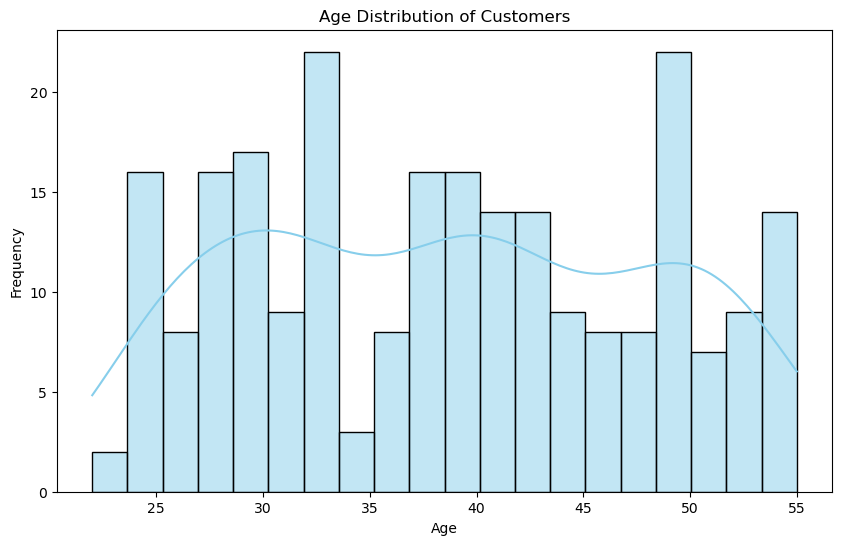

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=20, kde= True, color='skyblue')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

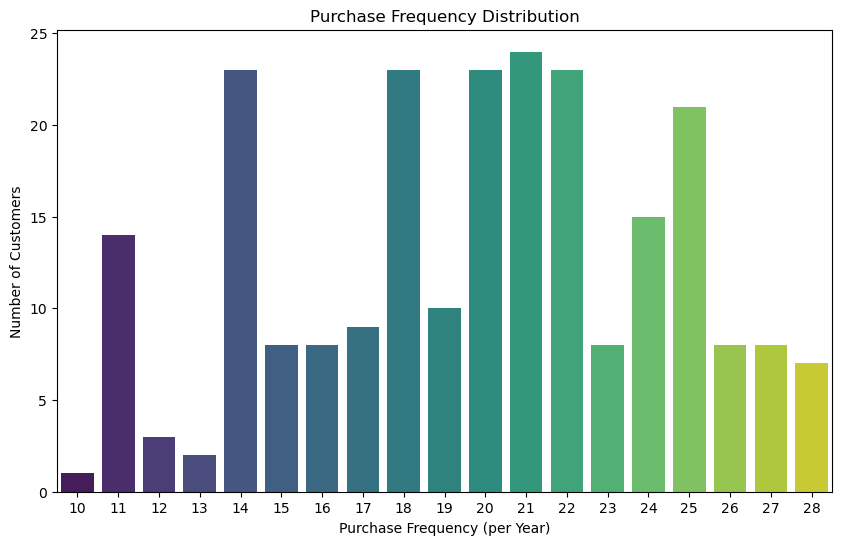

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='purchase_frequency', data=df, palette='viridis')
plt.title('Purchase Frequency Distribution')
plt.xlabel('Purchase Frequency (per Year)')
plt.ylabel('Number of Customers')
plt.show()

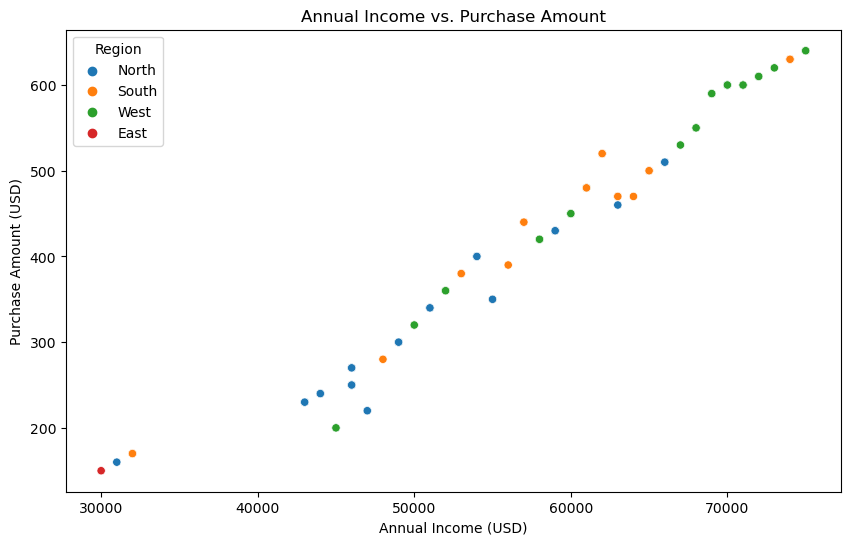

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='annual_income', y='purchase_amount', data=df, hue='region')
plt.title('Annual Income vs. Purchase Amount')
plt.xlabel('Annual Income (USD)')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Region')
plt.show()

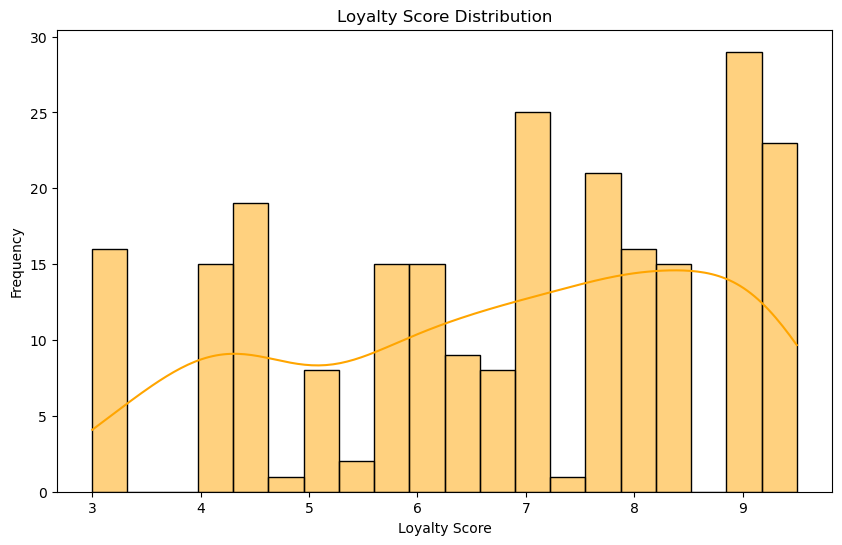

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['loyalty_score'], bins=20, kde=True, color='orange')
plt.title('Loyalty Score Distribution')
plt.xlabel('Loyalty Score')
plt.ylabel('Frequency')
plt.show()

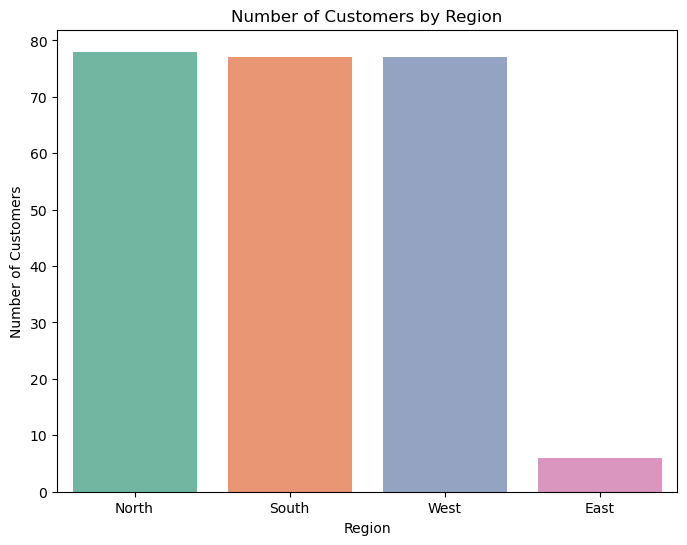

In [21]:
plt.figure(figsize=(8,6))
sns.countplot(x='region', data=df, palette='Set2')
plt.title('Number of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

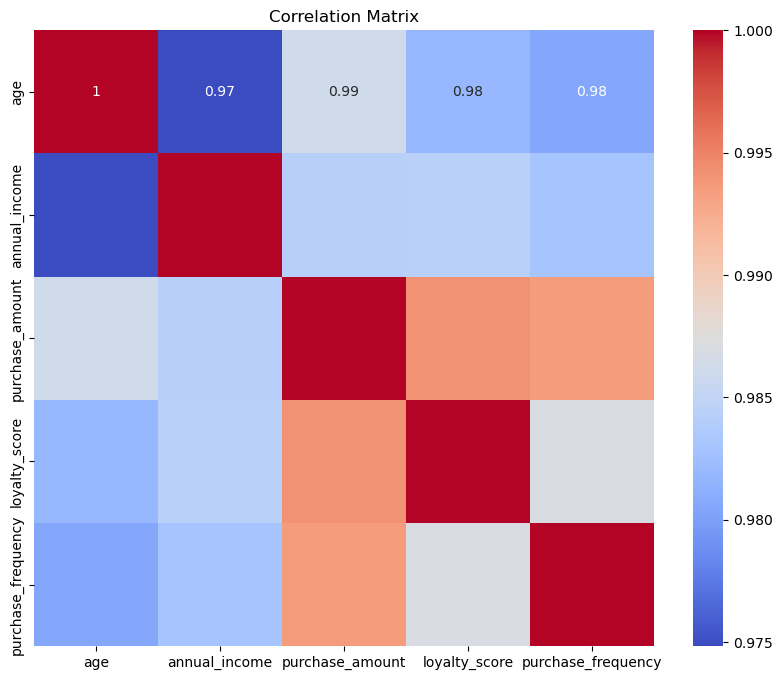

In [23]:
corr_matrix = df[['age', 'annual_income', 'purchase_amount', 'loyalty_score', 'purchase_frequency']].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

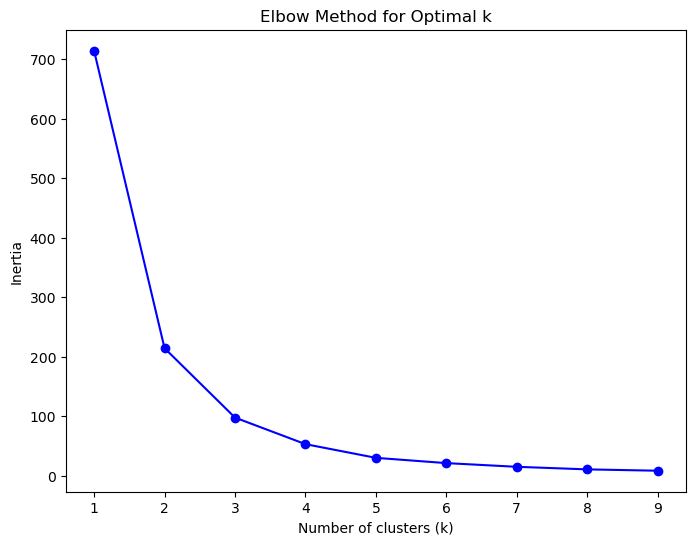

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = df[['annual_income','purchase_amount','purchase_frequency']]

scaler = StandardScaler()
scaled_features =scaler.fit_transform(features)

inertia = []
K = range (1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()